In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({
    "font.size": 15,  # Match LaTeX caption size
})

## Errors

In [2]:
# DAQ errors
DACRes = 5 / 2**(12)
AbsoluteAccuracyofDAC = 7e-3 # in normal working conditions.
Vaerr = DACRes + (7e-3)
print(Vaerr)

0.008220703125


## 30mA Filament Current Graphs (No Analysis)

In [3]:
data30 = np.loadtxt('30mA.txt')
iv30 = data30[:,0]
current30 = data30[:,1]

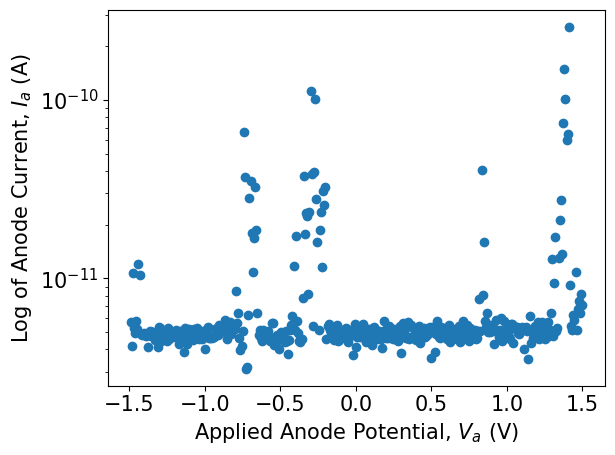

In [4]:
plt.scatter(iv30, current30)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.tight_layout()
plt.savefig('30ma.png')

## 65mA filament current

In [5]:
data65 = np.loadtxt('65mAlessnoisy.txt')
iv65 = data65[:,0]
current65 = data65[:,1]

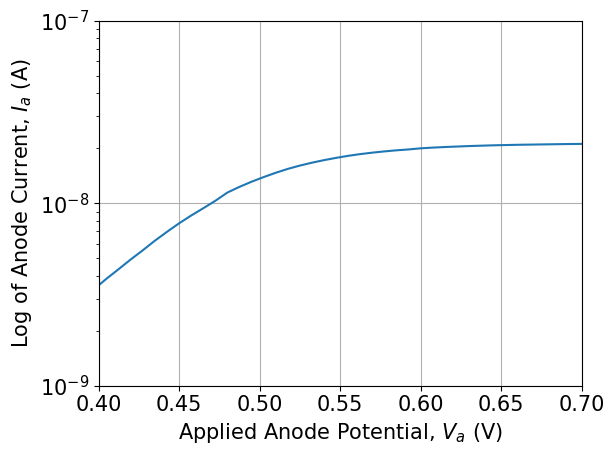

In [6]:
plt.plot(iv65, current65)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.grid(True)
plt.xlim(0.4,0.7)
plt.ylim(1e-9,1e-7)
plt.tight_layout()
plt.savefig('65mazoomed.png')

In [7]:
# finding necessary indices
va0index = np.argmin(np.abs(iv65)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv65-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv65-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 200
max tp anode potential: 140
flat saturated current anode potential: 107


Fitted Electron Temperature: 702.03 K


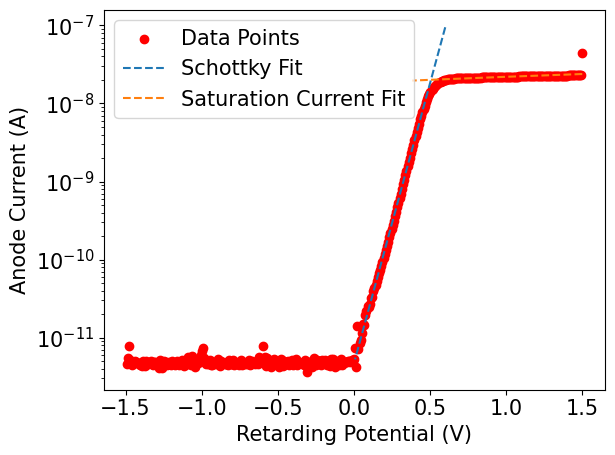

In [8]:
# letting I_{AS} R_A be a constant = A to be determined by scipy
# defining the Schottky equation for fitting
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23  
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv65[140:200], current65[140:200], p0=[0.5, 5e-8, 450])  

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv65[:107], current65[:107], p0=[0, 2e-8]) 

plt.figure()
plt.scatter(iv65, current65, label='Data Points', color='red')
plt.plot(iv65[120:200], schottky_curve(iv65[120:200], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv65[:150], linear(iv65[:150], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log')  
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('65ma702.03K.png')
plt.show()

## 70mA filament current

In [9]:
data70 = np.loadtxt('70mA.txt')
iv70 = data70[:,0]
current70 = data70[:,1]

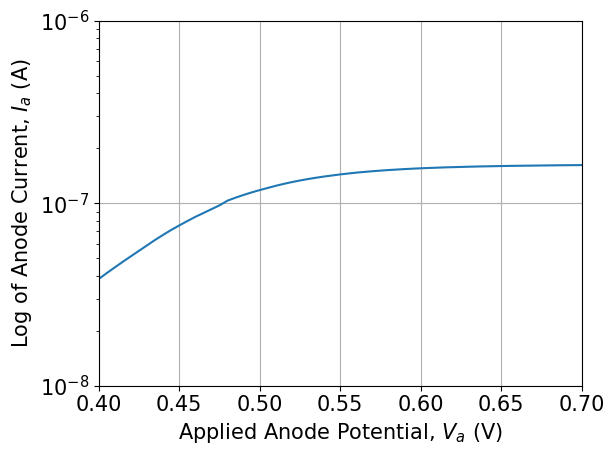

In [10]:
plt.plot(iv70, current70)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.grid()
plt.xlim(.4,.7)
plt.ylim(1e-8,1e-6)
plt.tight_layout()
plt.savefig('70mazoomed.png')

In [11]:
# finding necessary indices
va0index = np.argmin(np.abs(iv70)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv70-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv70-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 300
max tp anode potential: 210
flat saturated current anode potential: 160


Fitted Electron Temperature: 708.33 K


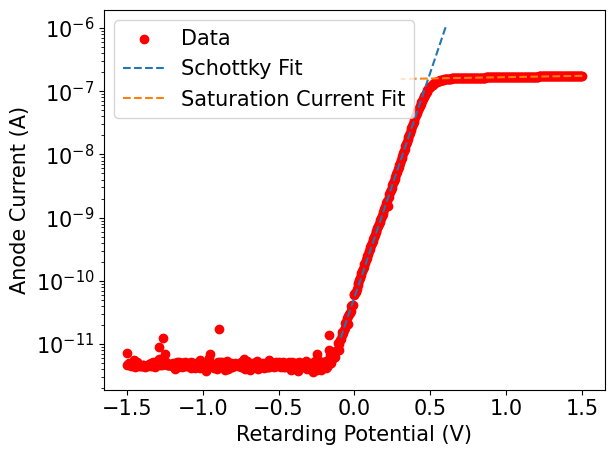

In [12]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23 
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv70[220:300], current70[220:300], p0=[0.5, 1e-7, 550]) 

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv70[:160], current70[:160], p0=[0, 2e-8])  

plt.figure()
plt.scatter(iv70, current70, label='Data', color='red')
plt.plot(iv70[180:320], schottky_curve(iv70[180:320], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv70[:240], linear(iv70[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log')
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('70ma708.33.png')
plt.show()

## 75mA filament current

In [13]:
data75 = np.loadtxt('75mA.txt')
iv75 = data75[:,0]
current75 = data75[:,1]

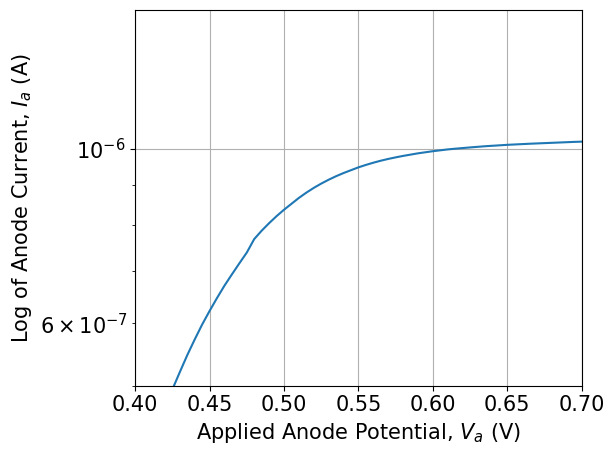

In [14]:
plt.plot(iv75, current75)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.xlim(0.4,0.7)
plt.ylim(5e-7,1.5e-6)
plt.grid()
plt.tight_layout()
plt.savefig('75mazoomed.png')


In [15]:
# finding necessary indices
va0index = np.argmin(np.abs(iv75)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv75-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv75-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 300
max tp anode potential: 210
flat saturated current anode potential: 160


Fitted Electron Temperature: 726.15 K


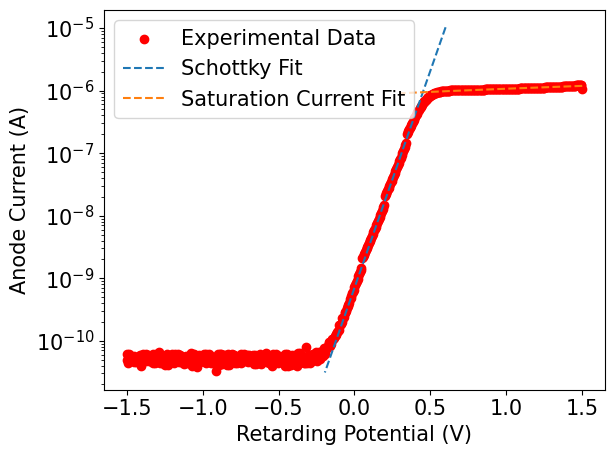

In [16]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23  
    e = 1.602e-19  
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv75[222:300], current75[222:300], p0=[0.35, 1e-6, 800])  

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv75[:160], current75[:160], p0=[0, 1e-6]) 

plt.figure()
plt.scatter(iv75, current75, label='Experimental Data', color='red')
plt.plot(iv75[180:340], schottky_curve(iv75[180:340], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv75[:240], linear(iv75[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log')  
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('75ma726.15.png')
plt.show()

## 80mA filament current

In [17]:
data80 = np.loadtxt('80mA.txt')
iv80 = data80[:,0]
current80 = data80[:,1]

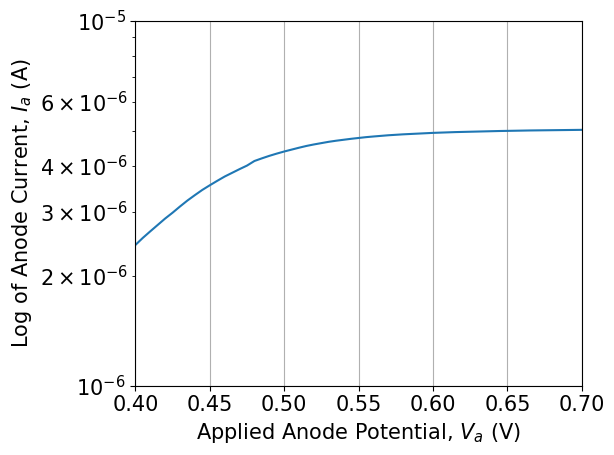

In [18]:
plt.plot(iv80, current80)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.grid()
plt.xlim(.4,.7)
plt.ylim(1e-6, 1e-5)
plt.tight_layout()
plt.savefig('80mazoomed.png')

In [19]:
# finding necessary indices
va0index = np.argmin(np.abs(iv80)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv80-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv80-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 300
max tp anode potential: 210
flat saturated current anode potential: 160


Fitted Electron Temperature: 757.98 K


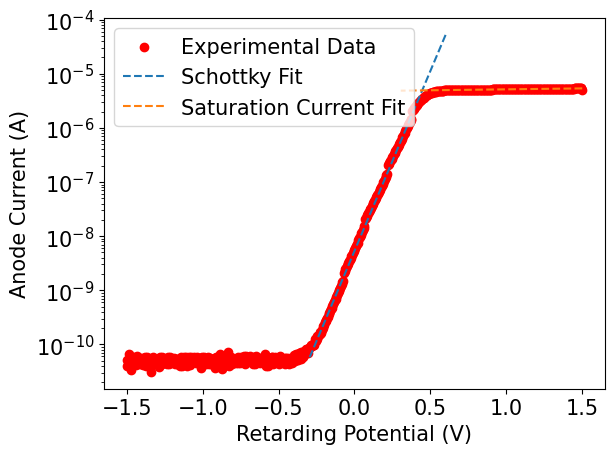

In [20]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23 
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv80[222:300], current80[222:300], p0=[0.4, 1e-6, 800])

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv80[:160], current80[:160], p0=[0, 1e-6]) 

plt.figure()
plt.scatter(iv80, current80, label='Experimental Data', color='red')
plt.plot(iv80[180:360], schottky_curve(iv80[180:360], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv80[:240], linear(iv80[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log') 
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('80ma757.98.png')
plt.show()

## 85mA filament current

In [21]:
data85 = np.loadtxt('85mA.txt')
iv85 = data85[:,0]
current85 = data85[:,1]

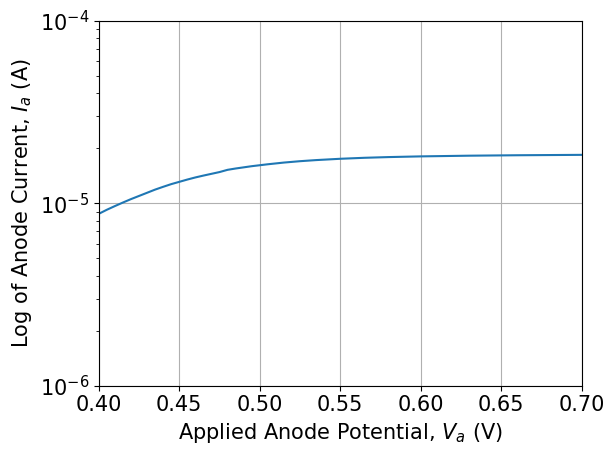

In [22]:
plt.plot(iv85, current85)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.grid()
plt.xlim(0.4,0.7)
plt.ylim(1e-6,1e-4)
plt.tight_layout()
plt.savefig('85mazoomed.png')

In [23]:
# finding necessary indices
targetval=-0.25
va0index = np.argmin(np.abs(iv85 - targetval)) 
print(f'min tp anode potential: {va0index}')
targetval=0.25
va045index = np.argmin(np.abs(iv85-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv85-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 350
max tp anode potential: 250
flat saturated current anode potential: 160


Fitted Electron Temperature: 801.75 K


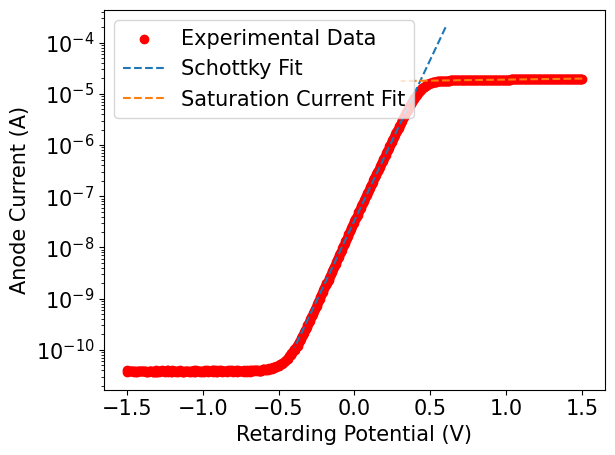

In [ ]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23  
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv85[250:350], current85[250:350], p0=[0.4, 1e-6, 750]) 

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv85[:160], current85[:160], p0=[0, 1e-6])  

plt.figure()
plt.scatter(iv85, current85, label='Experimental Data', color='red')
plt.plot(iv85[180:380], schottky_curve(iv85[180:380], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv85[:240], linear(iv85[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log') 
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.tight_layout()
plt.legend()
plt.savefig('85ma801.75.png')
plt.show()

## 90mA filament current

In [25]:
data90 = np.loadtxt('90.2mA.txt')
iv90 = data90[:,0]
current90 = data90[:,1]

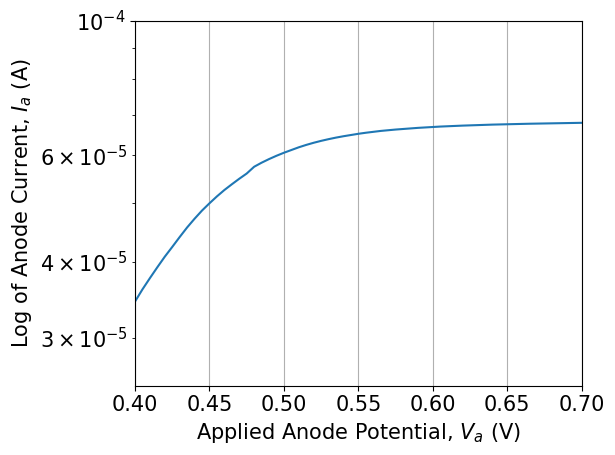

In [26]:
plt.plot(iv90, current90)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
# print(current90)
plt.grid()
plt.xlim(0.4,0.7)
plt.ylim(2.5e-5,1e-4)
plt.tight_layout()
plt.savefig('90mazoomed.png')

In [27]:
# finding necessary indices
targetval=-0.5
va0index = np.argmin(np.abs(iv90 - targetval)) 
print(f'min tp anode potential: {va0index}')
targetval=0.2
va045index = np.argmin(np.abs(iv90-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv90-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 400
max tp anode potential: 260
flat saturated current anode potential: 160


Fitted Electron Temperature: 809.08 K


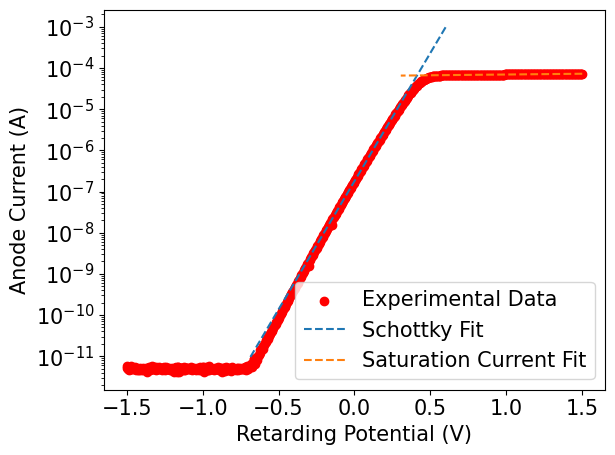

In [28]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23 
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv90[280:400], current90[280:400], p0=[0.4, 1e-4, 770]) 

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv90[:160], current90[:160], p0=[0, 1e-6]) 

plt.figure()
plt.scatter(iv90, current90, label='Experimental Data', color='red')
plt.plot(iv90[180:440], schottky_curve(iv90[180:440], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv90[:240], linear(iv90[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log')  
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('90ma809.08.png')
plt.show()

## 95mA filament current

In [29]:
data95 = np.loadtxt('95mA.txt')
iv95 = data95[:,0]
current95 = data95[:,1]

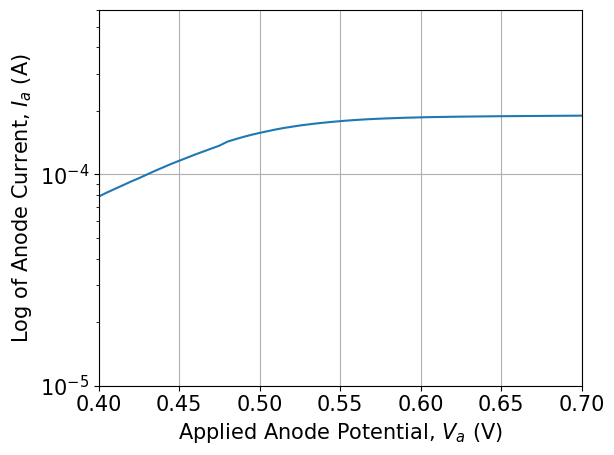

In [30]:
plt.plot(iv95, current95)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
# print(current95)
plt.grid()
plt.xlim(0.4,0.7)
plt.ylim(1e-5,6e-4)
plt.tight_layout()
plt.savefig('95mazoomed.png')

In [31]:
# finding necessary indices
targetval=-0.6
va0index = np.argmin(np.abs(iv95 - targetval)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv95-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.7
va07index = np.argmin(np.abs(iv95-targetval))
print(f'flat saturated current anode potential: {va07index}')

min tp anode potential: 420
max tp anode potential: 210
flat saturated current anode potential: 160


Fitted Electron Temperature: 826.01 K


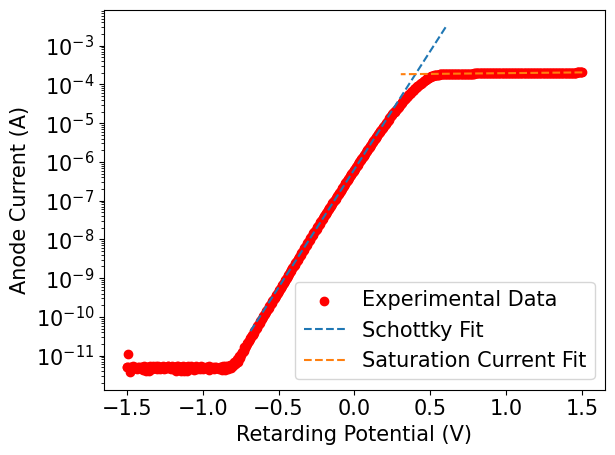

In [32]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23  
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv95[320:420], current95[320:420], p0=[0.45, 1e-4, 800])  

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv95[:160], current95[:160], p0=[0, 1e-6]) 

plt.figure()
plt.scatter(iv95, current95, label='Experimental Data', color='red')
plt.plot(iv95[180:440], schottky_curve(iv95[180:440], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv95[:240], linear(iv95[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log')  
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('95ma826.01.png')
plt.show()

## 100mA filament current

In [33]:
data100 = np.loadtxt('100mA.txt')
iv100 = data100[:,0]
current100 = data100[:,1]

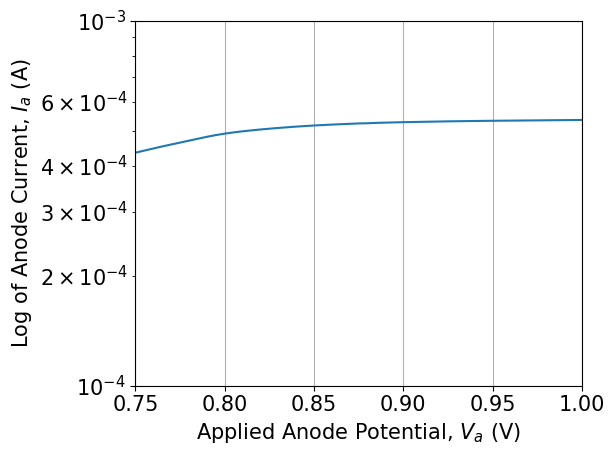

In [34]:
plt.plot(iv100, current100)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.xlim(0.75,1)
plt.grid()
plt.ylim(1e-4,1e-3)
plt.tight_layout()
plt.savefig('100mazoomed.png')

In [35]:
# finding necessary indices
targetval=-0.6
va0index = np.argmin(np.abs(iv100 - targetval)) 
print(f'min tp anode potential: {va0index}')
targetval=0.45
va045index = np.argmin(np.abs(iv100-targetval))
print(f'max tp anode potential: {va045index}')
targetval = 0.9
va09index = np.argmin(np.abs(iv100-targetval))
print(f'flat saturated current anode potential: {va09index}')

min tp anode potential: 420
max tp anode potential: 210
flat saturated current anode potential: 120


Fitted Electron Temperature: 874.64 K


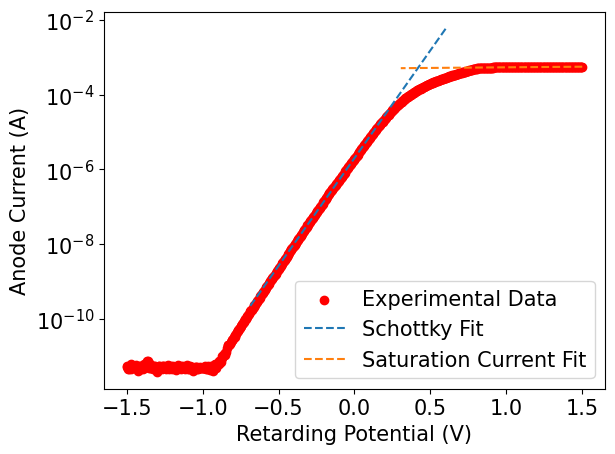

In [36]:
def schottky_curve(Va, Vc, A, T):
    k_B = 1.38e-23  
    e = 1.602e-19   
    return A * np.exp((e * (Va + Vc)) / (k_B * T))

popt, pcov = curve_fit(schottky_curve, iv100[320:420], current100[320:420], p0=[0.45, 1e-4, 800])  

Vcfit, Afit, Tfit = popt
print(f"Fitted Electron Temperature: {Tfit:.2f} K")

def linear(x, m, c):
    return m * x + c

popt2, pcov2 = curve_fit(linear, iv100[:120], current100[:120], p0=[0, 1e-3]) 

plt.figure()
plt.scatter(iv100, current100, label='Experimental Data', color='red')
plt.plot(iv100[180:440], schottky_curve(iv100[180:440], *popt), label=f'Schottky Fit', linestyle='--')
plt.plot(iv100[:240], linear(iv100[:240], *popt2), linestyle='--', label='Saturation Current Fit')
plt.yscale('log') 
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Anode Current (A)")
plt.legend()
plt.tight_layout()
plt.savefig('100ma874.64.png')
plt.show()

## 107.4mA filament current

In [37]:
data1074 = np.loadtxt('107.4mA.txt')
iv1074 = data1074[:,0]
current1074 = data1074[:,1]

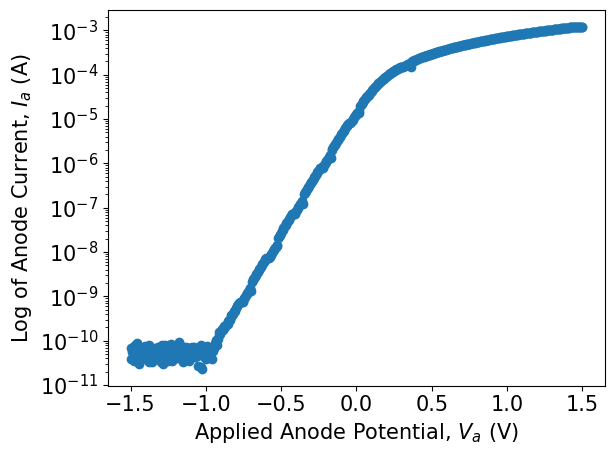

In [38]:
plt.scatter(iv1074, current1074)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.tight_layout()
plt.savefig('1074ma.png')

## Putting all curves together

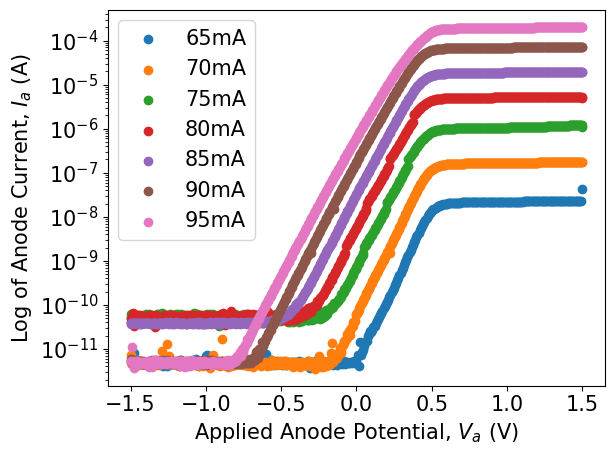

In [39]:
# plt.scatter(iv30, current30)
plt.scatter(iv65, current65, label='65mA')
plt.scatter(iv70, current70, label='70mA')
plt.scatter(iv75, current75, label='75mA')
plt.scatter(iv80, current80, label='80mA')
plt.scatter(iv85, current85, label='85mA')
plt.scatter(iv90, current90, label='90mA')
plt.scatter(iv95, current95, label='95mA')
# plt.scatter(iv100, current100, label='100mA')
# plt.scatter(iv1074, current1074)
plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
plt.tight_layout()
plt.legend()
plt.savefig('allschottkycurves.png')

## Finding the work functions

In [40]:
# finding the saturation currents and contact potentials from the data
targetval=0.55 # picked by eye for each graph as the contact potential point
ivindex = np.argmin(np.abs(iv65-targetval))
print(f'sat anode potential: {ivindex}')
targetval=.6
ivindex = np.argmin(np.abs(iv70-targetval))
print(f'sat anode potential: {ivindex}')

ivindex = np.argmin(np.abs(iv75-targetval))
print(f'sat anode potential: {ivindex}')
targetval=.55
ivindex = np.argmin(np.abs(iv80-targetval))
print(f'sat anode potential: {ivindex}')
ivindex = np.argmin(np.abs(iv85-targetval))
print(f'sat anode potential: {ivindex}')
ivindex = np.argmin(np.abs(iv90-targetval))
print(f'sat anode potential: {ivindex}')
ivindex = np.argmin(np.abs(iv95-targetval))
print(f'sat anode potential: {ivindex}')

Vcfromdata = [iv65[127], iv70[180], iv75[180], iv80[190], iv85[190], iv90[190], iv95[190]]

sat anode potential: 127
sat anode potential: 180
sat anode potential: 180
sat anode potential: 190
sat anode potential: 190
sat anode potential: 190
sat anode potential: 190


In [41]:
satcurrents = []
satcurrents.append(current65[127])
satcurrents.append(current70[180])
satcurrents.append(current75[180])
satcurrents.append(current80[190])
satcurrents.append(current85[190])
satcurrents.append(current90[190])
satcurrents.append(current95[190])
print(satcurrents)

# finding anode currents at Va = 0
# print(np.argmin(np.abs(iv65)))
# print(np.argmin(np.abs(iv70)))
# print(np.argmin(np.abs(iv75)))
# print(np.argmin(np.abs(iv80)))
# print(np.argmin(np.abs(iv85)))
# print(np.argmin(np.abs(iv90)))
# print(np.argmin(np.abs(iv95)))

# print(current65[200])
# print(current70[300])
# print(current75[300])
# print(current80[300])
# print(current85[300])
# print(current90[300])
# print(current95[300])

Ia0 = [5.27852e-12, 6.260985e-11, 7.130026100000002e-10, 5.6694542e-09, 3.2897453e-08, 1.74239753e-07, 6.2896132e-07]
Temp = [702.03, 708.33, 726.15, 757.98, 801.75, 809.08, 826.01]


[np.float64(1.7709337700000003e-08), np.float64(1.55266097e-07), np.float64(9.9263715e-07), np.float64(4.7710418e-06), np.float64(1.75025119e-05), np.float64(6.506768e-05), np.float64(0.000178759582)]


In [42]:
# cathode work function

def cathodewf(T, Ias):
    return (1.984e-4) * T * (2.079 + 2*np.log10(T) - np.log10(Ias/0.134))

# anode work function
def anodewf(T, Ia0):
    return (1.984e-4) * T * (2.079 + np.log10(1.594) + 2*np.log10(T) - np.log10(Ia0/0.134))


In [43]:
cwflist = []
awflist = []
for i, j in zip(satcurrents, Temp):
    print(j)
    cwf = cathodewf(j, i)
    print(cwf)
    cwflist.append(cwf)

for i,j in zip(Ia0, Temp):
    awf = anodewf(j, i)
    awflist.append(awf)

awflist = np.array(awflist)
cwflist = np.array(cwflist)

print(f'Anode Work Functions {awflist}')
print(f'Cathode Work Functions {cwflist}')
print(f'Contact Potential Differences {awflist-cwflist}')

702.03
2.0405778115367266
708.33
1.9274757832945466
726.15
1.8629982437623318
757.98
1.847729758132045
801.75
1.8723931110144332
809.08
1.7992406201372615
826.01
1.7679098025939077
Anode Work Functions [2.55984877 2.43296088 2.34507735 2.31806238 2.3382097  2.24464057
 2.20319801]
Cathode Work Functions [2.04057781 1.92747578 1.86299824 1.84772976 1.87239311 1.79924062
 1.7679098 ]
Contact Potential Differences [0.51927096 0.5054851  0.48207911 0.47033262 0.46581659 0.44539995
 0.43528821]


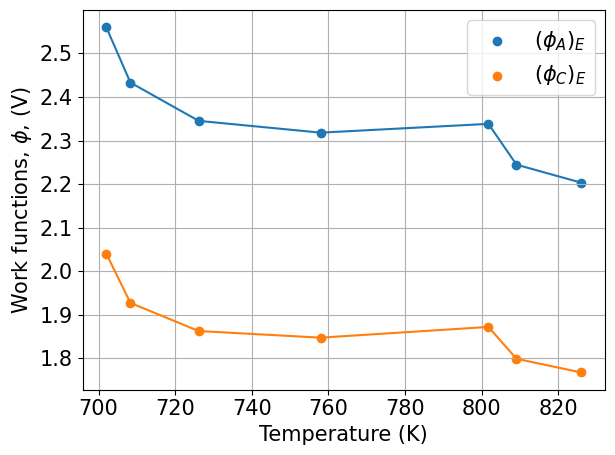

In [53]:
plt.scatter(Temp, awflist, label='$(\\phi_A)_E$')
plt.scatter(Temp, cwflist, label='$(\\phi_C)_E$')
plt.plot(Temp, awflist)
plt.plot(Temp, cwflist)
plt.grid(True)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Work functions, $\\phi$, (V)')
plt.tight_layout()
plt.savefig('wf.png')

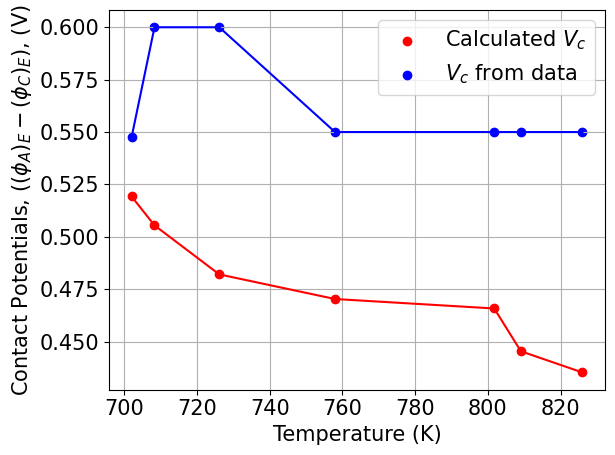

In [54]:
plt.scatter(Temp, awflist - cwflist, label='Calculated $V_c$', color='r')
plt.scatter(Temp, Vcfromdata, label='$V_c$ from data', color='b')
plt.plot(Temp, awflist - cwflist, color='r')
plt.plot(Temp, Vcfromdata, color='b')
plt.grid(True)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Contact Potentials, $((\\phi_A)_E - (\\phi_C)_E)$, (V)')
plt.tight_layout()
plt.savefig('Vc.png')

## Trying to let T be a free parameter for a contact potential of 0.55

In [46]:
# deriving relationship between temp and saturation current
lny = np.log(satcurrents)

popt, pcov = curve_fit(linear, Temp, lny)

xfit = np.linspace(500, 1000, 100)
Afit, Bfit = popt
yfit = linear(xfit, Afit, Bfit)

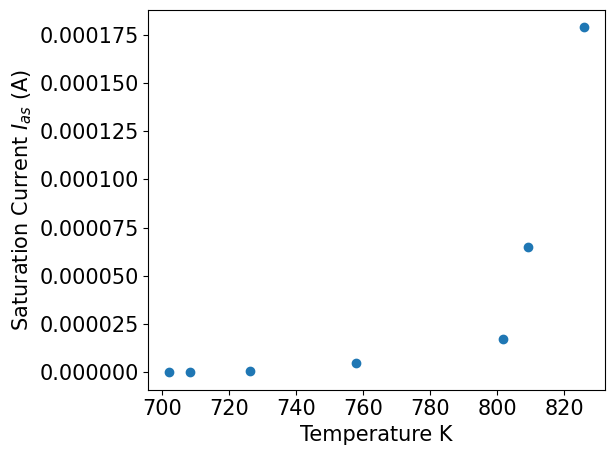

In [47]:
plt.scatter(Temp, satcurrents)
# plt.yscale('log')
# linear relatioonship implies its an exponential relationship
plt.xlabel('Temperature K')
plt.ylabel('Saturation Current $I_{as}$ (A)')
plt.tight_layout()
plt.savefig('exp.png')

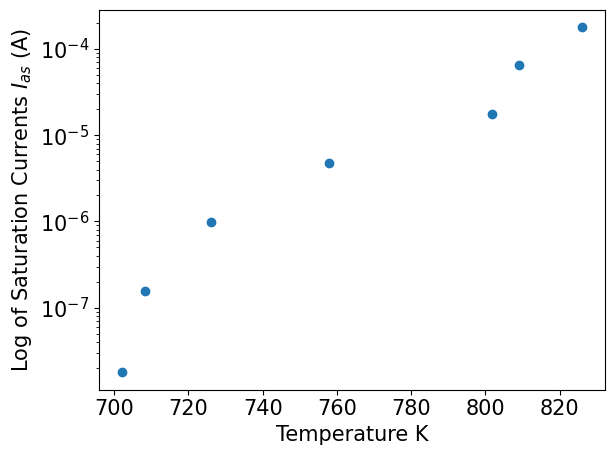

In [48]:
plt.scatter(Temp, satcurrents)
plt.yscale('log')
# linear relatioonship implies its an exponential relationship
plt.xlabel('Temperature K')
plt.ylabel('Log of Saturation Currents $I_{as}$ (A)')
plt.tight_layout()
plt.savefig('semilog.png')

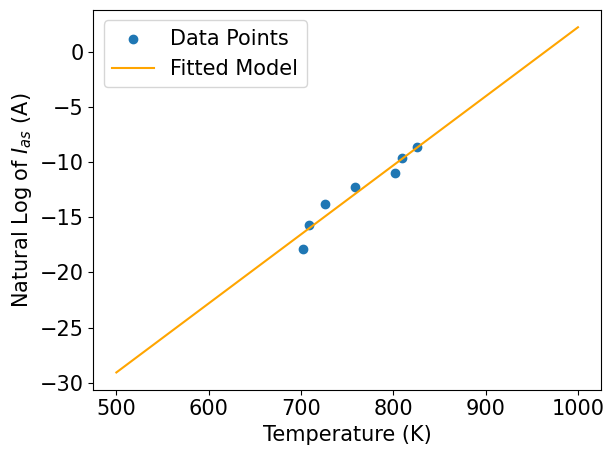

In [49]:
plt.scatter(Temp,np.log(satcurrents), label='Data Points')
plt.plot(xfit, yfit, label='Fitted Model', color='orange')
plt.xlabel('Temperature (K)')
plt.ylabel('Natural Log of $I_{as}$ (A)')
plt.tight_layout()
plt.legend()
plt.savefig('satcurrentvstemp.png')

/tmp/ipykernel_11705/2638930010.py:8: RuntimeWarning: invalid value encountered in sqrt
  term1 = R_A * np.exp(eta_A) * (erf((-eta_A / (R_A**2 -1))**(1/2)))  # First erf term
/tmp/ipykernel_11705/2638930010.py:9: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1 - (erf((-eta_A / (1 - 1/R_A**2))**(1/2)))  # Second erf term


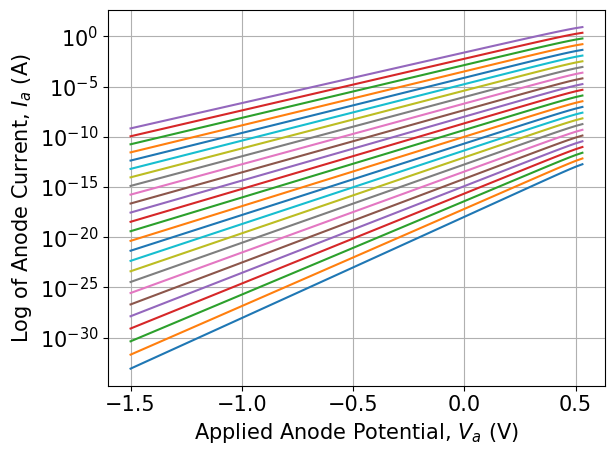

In [50]:
# letting T be a free parameter
from scipy.special import erf
def schottkyTfreeparam(Ias, Va, Vc, T):
    k_B = 1.38e-23
    e = 1.602e-19
    R_A = 1.594
    eta_A = (e * (Va + Vc)) / (k_B * T)
    term1 = R_A * np.exp(eta_A) * (erf((-eta_A / (R_A**2 -1))**(1/2)))  # First erf term
    term2 = 1 - (erf((-eta_A / (1 - 1/R_A**2))**(1/2)))  # Second erf term
    
    Ia = Ias * (term1 + term2)
    return Ia



Va = np.linspace(-1.5, 1.5, 100)
Vc = -0.55  # this is defined as phi a - phi c so when in equation for eta
# above it must be given a negative value as V_R = V_A + (phi c - phi a) and it works

Tvals = []
Trand = np.linspace(500, 1000, 25)

for t in Trand:
    Tvals.append(t)

Iaslist = []
for T in Tvals:
    Iasat = linear(T, Afit, Bfit)
    Iaslist.append(np.exp(Iasat))

for T, i in zip(Tvals, Iaslist):
    Ia = schottkyTfreeparam(i, Va, Vc, T)
    plt.plot(Va, Ia, label=f'{T:.2f}K')

plt.yscale('log')
plt.xlabel('Applied Anode Potential, $V_a$ (V)')
plt.ylabel('Log of Anode Current, $I_a$ (A)')
# plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Tasafreeparameter.png')

601


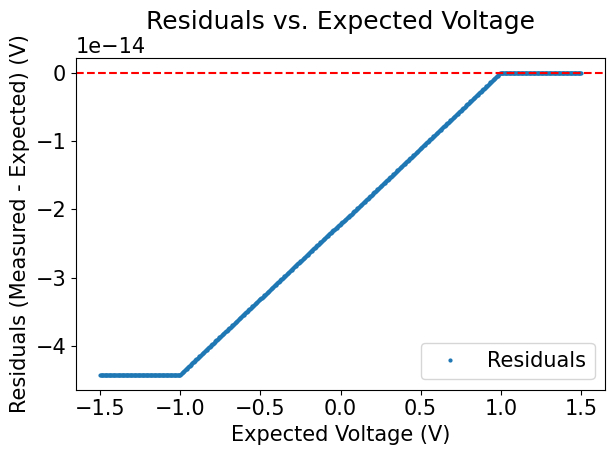

In [51]:
# expected votlage array
expected_voltages = np.arange(1.5, -1.505, -0.005)
print(len(expected_voltages))

# calculating residuals
residuals = iv80 - expected_voltages

plt.plot(expected_voltages, residuals, 'o', markersize=2, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Expected Voltage (V)")
plt.ylabel("Residuals (Measured - Expected) (V)")
plt.title("Residuals vs. Expected Voltage")
plt.legend()
plt.tight_layout()
plt.savefig('residuals.png')
plt.show()
